In [1]:
%cd "D:\School\Graduate 2022 Summer\ROAR CSV\ROAR CSV"

D:\School\Graduate 2022 Summer\ROAR CSV\ROAR CSV


In [2]:
pwd()

'D:\\School\\Graduate 2022 Summer\\ROAR CSV\\ROAR CSV'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
first_file = pd.read_csv('clean_data_2022.06.09_11.43.06.csv', parse_dates = ['datetime'])
# second_file  = pd.read_csv('clean_data_2022.06.09_11.57.25.csv', parse_dates = ['datetime'])



df3 = pd.concat([first_file, second_file])
len(df3.loc[(df3['HoverOrNot'] == 10)])

778

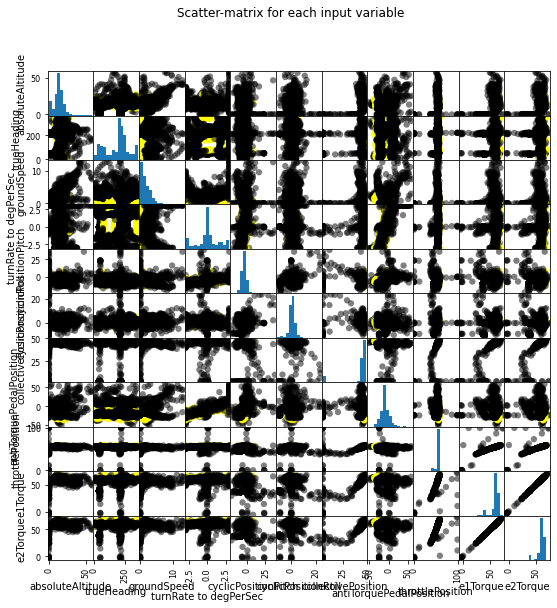

In [47]:
from pandas.plotting import scatter_matrix
from matplotlib import cm

feature_names = ['absoluteAltitude',
                 'trueHeading', 
                 'groundSpeed', 
#                  'climbOrDescentRate',
#                  'hasWeightOnWheels',
                 'turnRate to degPerSec',
                 'cyclicPositionPitch',
                 'cyclicPositionRoll',
                 'collectivePosition',
                 'antiTorquePedalPosition',
                 'throttlePosition',
                 'e1Torque',
                 'e2Torque']
# feature_names = ['absoluteAltitude',
#                  'trueHeading', 
#                  'groundSpeed', 
#                  ]
                
                
                
X = df3[feature_names]


cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=160)


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2, weights = 'distance')
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.96


([<matplotlib.axis.XTick at 0x183767c52b0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

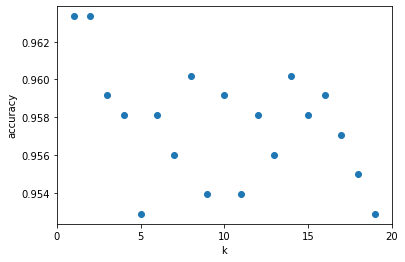

In [50]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [38]:
validation_set = pd.read_csv('clean_data_2022.06.09_11.57.25.csv', parse_dates = ['datetime'])
validation_set

,datetime,latitude,longitude,absoluteAltitude,trueHeading,groundSpeed,trueAirspeed,climbOrDescentRate,hasWeightOnWheels,turnRate to degPerSec,cyclicPositionPitch,cyclicPositionRoll,collectivePosition,antiTorquePedalPosition,throttlePosition,e1Torque,e2Torque,HoverOrNot,RighTurn,LeftTurn
0,2022-06-09 15:58:15,39.464829,-74.565914,0.030000,221.426125,0.058286,0.119632,0.914042,1.0,-0.267583,7.908500,-0.583583,3.530000,-24.160000,0.000000,-5.871208,-5.871208,0,0,0
1,2022-06-09 15:58:16,39.464829,-74.565914,0.056275,220.822078,0.042612,0.072271,2.014627,1.0,-0.407353,-0.622157,0.525784,3.530000,-24.160000,0.000000,-4.333941,-4.333941,0,0,0
2,2022-06-09 15:58:17,39.464829,-74.565914,0.060000,220.987824,0.005681,0.009573,0.843118,1.0,-0.204529,0.163902,-0.048863,3.530000,-24.160000,0.975882,-2.378314,-2.378314,0,0,0
3,2022-06-09 15:58:18,39.464829,-74.565914,0.060000,221.050830,0.001487,0.002582,0.222189,1.0,-0.106906,-0.030604,-0.085679,3.530000,-24.163453,59.456925,0.651774,0.651774,0,0,0
4,2022-06-09 15:58:19,39.464829,-74.565914,0.060000,221.103255,0.001394,0.002474,0.073961,1.0,-0.049804,-0.003608,-0.133314,3.491745,-24.174176,100.000000,10.487333,10.487333,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128,2022-06-09 16:33:43,39.464875,-74.565820,0.053200,211.677900,0.001292,0.002405,0.012520,1.0,-0.031260,-6.781720,-9.231040,3.465000,-24.815340,12.067640,17.176460,17.176460,0,0,0
2129,2022-06-09 16:33:44,39.464875,-74.565820,0.060000,211.531400,0.001114,0.002050,0.064300,1.0,-0.059040,-6.974820,-9.181680,3.465000,-24.818520,0.000000,-4.036980,-4.036980,0,0,0
2130,2022-06-09 16:33:45,39.464875,-74.565820,0.060000,211.591940,0.001078,0.001825,0.064120,1.0,-0.018180,-7.299580,-9.198440,3.465000,-24.834300,0.000000,-2.828460,-2.828460,0,0,0
2131,2022-06-09 16:33:46,39.464875,-74.565820,0.060000,211.640939,0.000592,0.001354,0.054143,1.0,0.003449,-7.520184,-9.216429,3.465000,-24.840184,0.000000,-1.642204,-1.642204,0,0,0


In [39]:
X_validation = validation_set[feature_names]
y_validation = validation_set['HoverOrNot']



X_valid = scaler.transform(X_validation)

In [40]:
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_valid, y_validation)))

Accuracy of K-NN classifier on test set: 0.59


In [41]:
prediction = knn.predict(X_valid)

In [42]:
validation_set['predicted_value'] = prediction

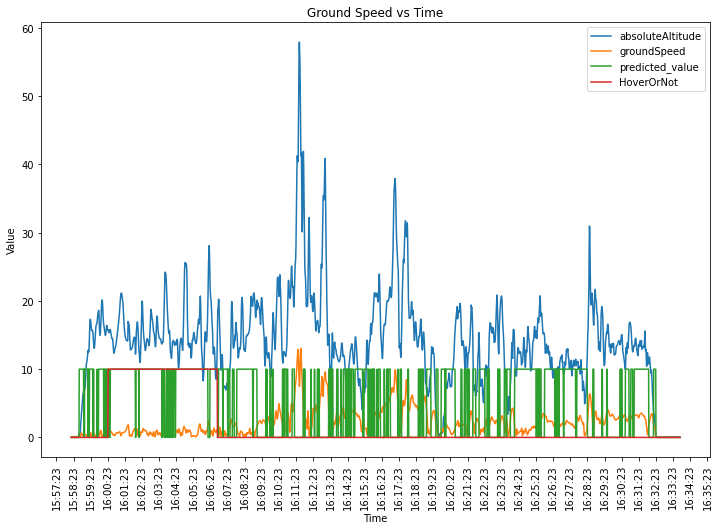

In [43]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 8))
plt.plot('datetime','absoluteAltitude',
         data = validation_set,
         label = "absoluteAltitude")
plt.plot('datetime','groundSpeed',
         data = validation_set,
         label = "groundSpeed")
# plt.plot('datetime','RighTurn',
#          data = df3,
#          label = "RighTurn")
# plt.plot('datetime','LeftTurn',
#          data = df3,
#          label = "LeftTurn")
plt.plot('datetime','predicted_value',
         data = validation_set,
         label = "predicted_value")
plt.plot('datetime','HoverOrNot',
         data = validation_set,
         label = "HoverOrNot")

#Set format of the plot chart
plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=60))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=90)
# plt.gcf().autofmt_xdate()


plt.xlabel('Time')
plt.ylabel('Value') 
plt.title('Ground Speed vs Time')
plt.legend()
plt.show()

In [ ]:
# Professor recommend using SGXBoost

